# Частина перша: Знайомство з Pandas

# Зчитуємо дані з вікіпедії

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url ='https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
df = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України')[0]

# Виводимо перші рядки таблиці

In [3]:
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


# Визначаємо кількість рядків та стовпців у датафреймі

In [4]:
print(f"Кількість рядків та стовпців: {df.shape}")

Кількість рядків та стовпців: (28, 9)


# Замінюємо у таблиці значення "—" на значення NaN

In [5]:
df = df.replace('—', np.nan, regex=True)

df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,NaN


# Визначаємо типи всіх стовпців

In [6]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

# Замінюємо типи нечислових колонок на числові

In [7]:
df.iloc[:, 1:] = df.iloc[:, 1:].astype(float)
df.dtypes

<ipython-input-7-d3cd2bf872f4>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 1:] = df.iloc[:, 1:].astype(float)


Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

# Частка пропусків що міститься в кожній колонці

In [8]:
null_perc = df.isnull().sum() / len(df) * 100
null_perc

Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64

# Видаліяємо з таблиці останній рядок таблиці

In [9]:
df.drop(df.index[-1], inplace=True)

In [10]:
df.tail()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
22,Черкаська,205.0,179.0,144.0,123.0,75.0,100.0,98.0,64.0
23,Чернівецька,247.0,218.0,170.0,148.0,101.0,128.0,129.0,92.0
24,Чернігівська,220.0,183.0,127.0,108.0,69.0,94.0,90.0,61.0
25,Київ,NaN,174.0,159.0,120.0,73.0,120.0,121.0,110.0
26,Севастополь,NaN,NaN,NaN,125.0,70.0,120.0,NaN,NaN


# Замінюємо відсутні дані в стовпцях середніми значеннями цих стовпців

In [11]:
df.fillna(df.mean(), inplace=True)

<ipython-input-11-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [12]:
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130.0,73.0,126.0,111.44,80.173913
1,Вінницька,224.0,192.0,142.0,124.0,84.0,112.0,109.00,76.000000
2,Волинська,247.0,250.0,179.0,153.0,112.0,148.0,141.00,101.000000
3,Дніпропетровська,204.0,204.0,151.0,123.0,71.0,112.0,111.00,71.000000
4,Донецька,271.0,214.0,140.0,109.0,61.0,98.0,82.00,80.173913


# Отримуємо список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [13]:
# Знайдемо середнє значення народжуваності за 2019 рік
mean_birth_rate = df['2019'].mean()
mean_birth_rate

80.17391304347828

In [14]:
# Відфільтруємо регіони, де народжуваність вища за середнє
regions_above_mean = df[df['2019'] > mean_birth_rate]['Регіон']
regions_above_mean

2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object

# Регіон з найвищою народжуваністю у 2014 році?

In [15]:
highest_birth_rate_region_2014 = df.sort_values('2014', ascending=False).iloc[0]['Регіон']
print("Регіон з найвищою народжуваністю у 2014 році:", highest_birth_rate_region_2014)

Регіон з найвищою народжуваністю у 2014 році: Рівненська


# Будуємо стовпчикову діаграму народжуваності по регіонах у 2019 році

In [16]:
import matplotlib.pyplot as plt

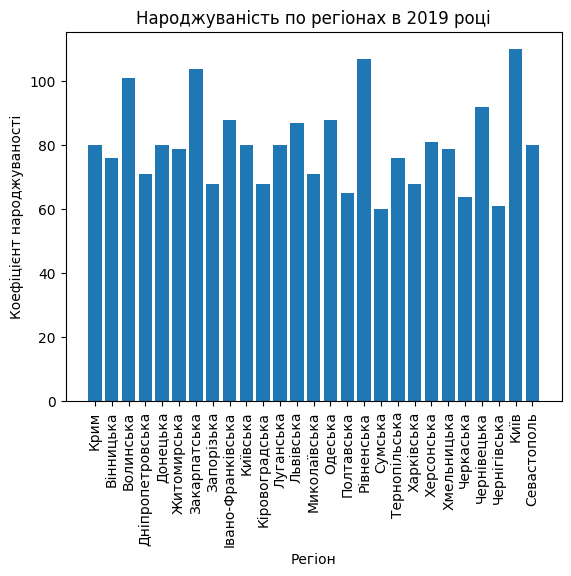

In [17]:
plt.bar(df['Регіон'], df['2019'])
plt.xticks(rotation=90)
plt.xlabel('Регіон')
plt.ylabel('Коефіцієнт народжуваності')
plt.title('Народжуваність по регіонах в 2019 році')
plt.show()

**Ще графіки**

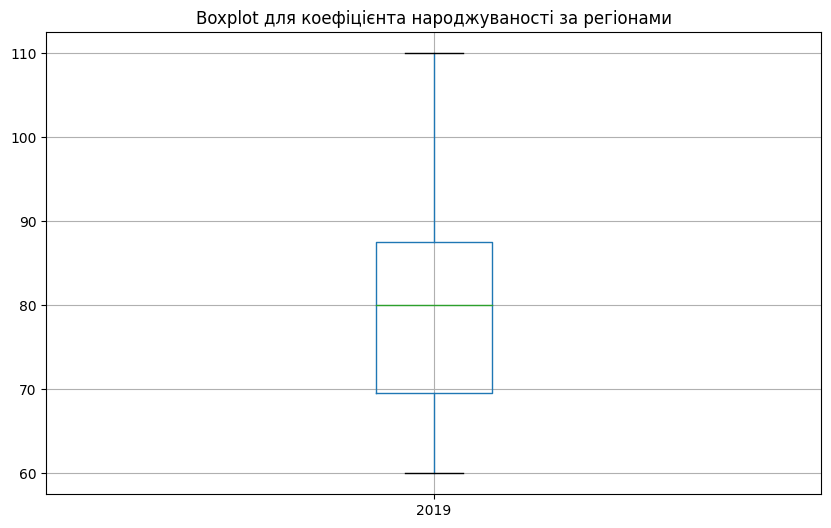

In [18]:
plt.figure(figsize=(10,6))
plt.title('Boxplot для коефіцієнта народжуваності за регіонами')
df.boxplot(column='2019', whis=1.5, sym='o')
plt.show()

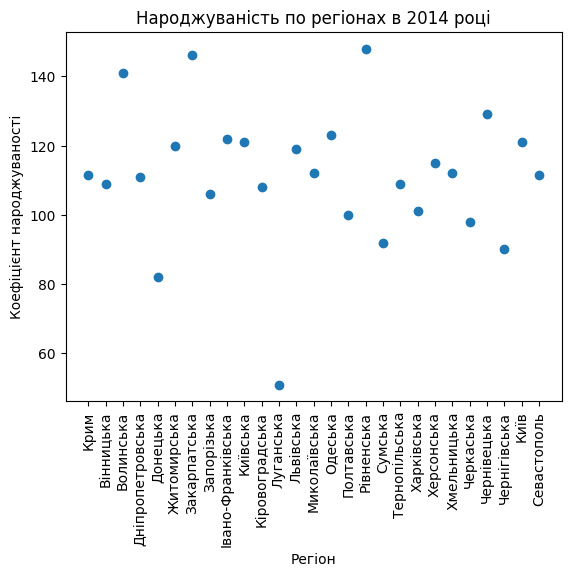

In [30]:
plt.scatter(df['Регіон'], df['2014'])
plt.xticks(rotation=90)
plt.xlabel('Регіон')
plt.ylabel('Коефіцієнт народжуваності')
plt.title('Народжуваність по регіонах в 2014 році')
plt.show()